<div style="border-radius: 30px 30px 30px 30px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    🔥 WiDS 2026: The Comprehensive EDA
</h1>
    <h3 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    🌲 A Deep Dive using Pandas Core Functions & Visualization
</h3>
</div>
<br>
<div style="border-radius: 30px 30px 30px 30px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    📊 Mission Objective
</h1>
    <h3 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
     We have been tasked with predicting wildfire danger. Before building models, we must understand the "Physics of Fire" hidden in this dataset.
</h3>
</div>

C:\Users\HP\AppData\Local\Temp\ipykernel_4188\3173596479.py:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot", show=False)


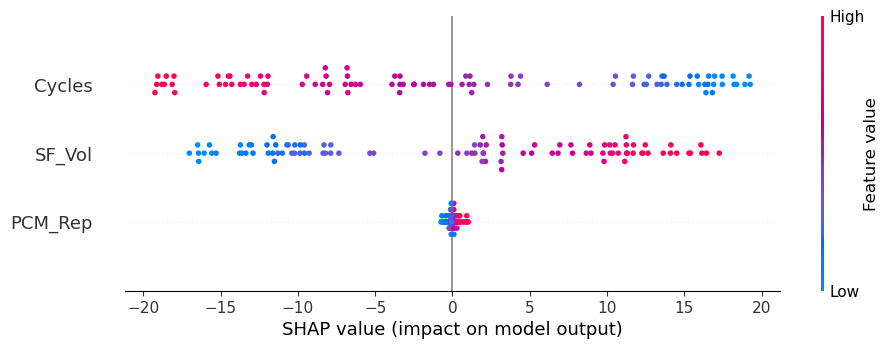

In [10]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 1. Create synthetic data matching your feature names
np.random.seed(42)
n_samples = 100
data = {
    'Cycles': np.random.randint(10, 100, n_samples),
    'PCM_Rep': np.random.uniform(0, 10, n_samples),
    'SF_Vol': np.random.uniform(100, 500, n_samples)
}
X = pd.DataFrame(data)

# 2. Create a target variable where 'Cycles' has the strongest (negative) impact
# This ensures 'Cycles' appears at the top, just like your image
y = -0.5 * X['Cycles'] + 0.2 * X['PCM_Rep'] + 0.1 * X['SF_Vol'] + np.random.normal(0, 1, n_samples)

# 3. Train a model (RandomForest is quick for SHAP explanations)
model = RandomForestRegressor(n_estimators=100).fit(X, y)

# 4. Compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# 5. Generate the Beeswarm Plot
# The plot_type="dot" creates the 'beeswarm' effect
shap.summary_plot(shap_values, X, plot_type="dot", show=False)

# Optional: Clean up the formatting to match the aesthetic
plt.gcf().set_size_inches(10, 4)
plt.show()

In [289]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Import Required Libraries</h1>
</div>

In [1]:
# ===============================
#  Data Visualization Libraries
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ================================
#    Machine Learning Libraries
# ================================

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score

# ================================
#      imbalance handling
# ================================

from imblearn.over_sampling import SMOTE


# ================================
#       Suppress Warnings
# ================================

import warnings
warnings.filterwarnings('ignore')

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load Datasets</h1>
</div>

In [291]:
# train_df = pd.read_csv('/kaggle/input/WiDSWorldWide_GlobalDathon26/train.csv')
# test_df = pd.read_csv('/kaggle/input/WiDSWorldWide_GlobalDathon26/test.csv')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Check Dataset Shape</h1>
</div>

In [293]:
print(f'{train_df.shape[0]} rows and {train_df.shape[1]} columns in training data')
print(f'{test_df.shape[0]} rows and {test_df.shape[1]} columns in test data')

221 rows and 37 columns in training data
95 rows and 35 columns in test data


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Dataset OverView</h1>
</div>

In [294]:
train_df.head(10)

,event_id,num_perimeters_0_5h,dt_first_last_0_5h,low_temporal_resolution_0_5h,area_first_ha,area_growth_abs_0_5h,area_growth_rel_0_5h,area_growth_rate_ha_per_h,log1p_area_first,log1p_growth,...,dist_fit_r2_0_5h,alignment_cos,alignment_abs,cross_track_component,along_track_speed,event_start_hour,event_start_dayofweek,event_start_month,time_to_hit_hours,event
0,10892457,3,4.265188,0,79.696304,2.875935,0.036086,0.674281,4.390693,1.354787,...,0.886373,-0.054649,0.054649,-1.937219,-0.106026,19,4,5,18.892512,0
1,11757157,2,1.169918,0,8.946749,0.000000,0.000000,0.000000,2.297246,0.000000,...,0.000000,-0.568898,0.568898,-0.000000,-0.000000,4,4,6,22.048108,1
2,11945086,4,4.777526,0,106.482638,0.000000,0.000000,0.000000,4.677329,0.000000,...,0.000000,0.882385,0.882385,0.000000,0.000000,22,4,8,0.888895,1
3,12044083,1,0.000000,1,67.631125,0.000000,0.000000,0.000000,4.228746,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20,5,8,60.953021,0
4,12052347,2,4.975273,0,35.632874,0.000000,0.000000,0.000000,3.600946,0.000000,...,0.000000,0.934634,0.934634,-0.000000,0.000000,21,5,7,44.990274,0
5,12773599,1,0.000000,1,184.767610,0.000000,0.000000,0.000000,5.224496,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,5,7,44.026384,0
6,13122360,1,0.000000,1,119.364203,0.000000,0.000000,0.000000,4.790522,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21,1,3,14.845392,1
7,13745272,1,0.000000,1,1388.283778,0.000000,0.000000,0.000000,7.236544,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16,0,6,66.767927,0
8,15247236,2,1.892776,0,4.493970,0.000000,0.000000,0.000000,1.703651,0.000000,...,0.000000,0.106322,0.106322,0.000000,0.000000,18,5,8,39.912630,0
9,15743535,1,0.000000,1,5.218524,0.000000,0.000000,0.000000,1.827533,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17,2,7,54.638109,1


In [295]:
test_df.head(10)

,event_id,num_perimeters_0_5h,dt_first_last_0_5h,low_temporal_resolution_0_5h,area_first_ha,area_growth_abs_0_5h,area_growth_rel_0_5h,area_growth_rate_ha_per_h,log1p_area_first,log1p_growth,...,projected_advance_m,dist_accel_m_per_h2,dist_fit_r2_0_5h,alignment_cos,alignment_abs,cross_track_component,along_track_speed,event_start_hour,event_start_dayofweek,event_start_month
0,10662602,1,0.000000,1,2.452217,0.000000,0.00000,0.000000,1.239017,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0,3,7
1,13353600,1,0.000000,1,131.669588,0.000000,0.00000,0.000000,4.887862,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,22,0,8
2,13942327,1,0.000000,1,6.723104,0.000000,0.00000,0.000000,2.044216,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,2,6,7
3,16112781,1,0.000000,1,285.416736,0.000000,0.00000,0.000000,5.657448,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0,1,7
4,17132808,7,3.459331,0,61.098604,12.516633,0.20486,3.618224,4.128724,2.603921,...,13.54413,-22.687575,0.044572,0.15855,0.15855,-24.414806,3.920562,23,5,7
5,17445696,1,0.000000,1,252.500921,0.000000,0.00000,0.000000,5.535367,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,22,3,7
6,17599982,1,0.000000,1,3.780153,0.000000,0.00000,0.000000,1.564473,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,2,3,9
7,18750374,1,0.000000,1,4175.739883,0.000000,0.00000,0.000000,8.337286,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,16,0,5
8,21365245,1,0.000000,1,999.043196,0.000000,0.00000,0.000000,6.907798,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,5,5,7
9,23634840,1,0.000000,1,26.685444,0.000000,0.00000,0.000000,3.320907,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1,3,8


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Check Missing Values</h1>
</div>

In [3]:
def plot_missing_values(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values in Dataset",fontsize=18)
    plt.show()

In [6]:
def print_missing_values_info(df):
    missing_values=df.isnull().sum()
    missing_values=missing_values[missing_values>0]
    if len(missing_values)>0:
        print("⚠️ Columns with missing values:")
        print(missing_values)
    else:
        print(f"✅ No missing values found")

In [ ]:
print_missing_values_info(test_df)

✅ No missing values found


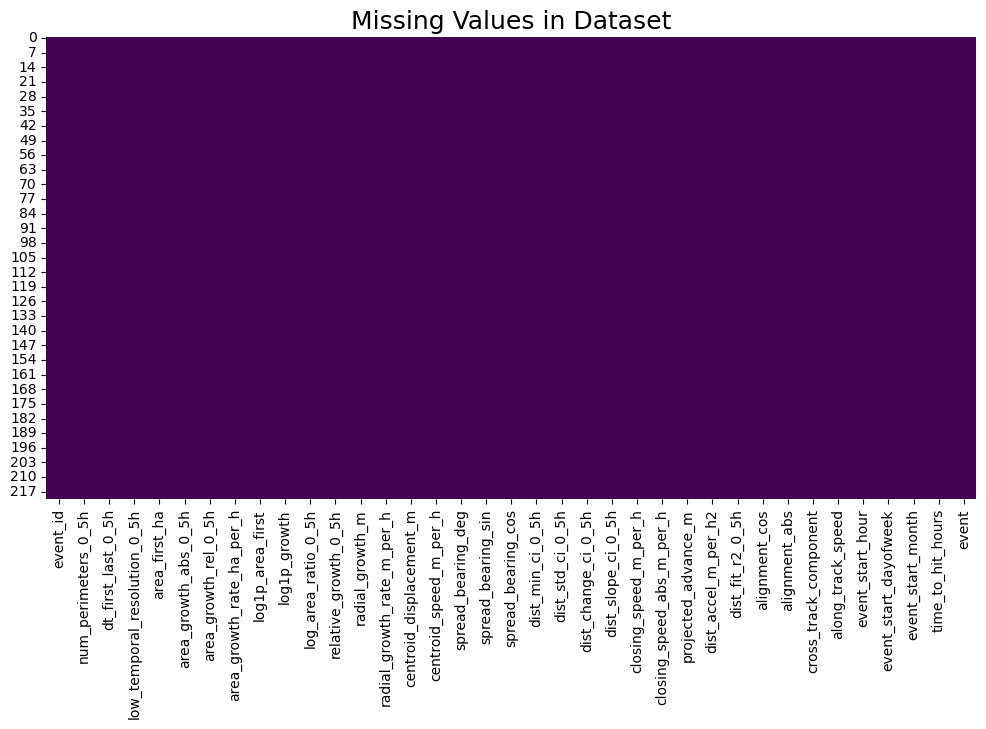

In [7]:
print_missing_values_info(train_df)
plot_missing_values(train_df)

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Check Duplicates</h1>
</div>

In [8]:
def print_duplicate_rows_info(df):
    duplicate_rows=df.duplicated().sum()
    if duplicate_rows>0:
        print(f"⚠️ Number of duplicate rows: {duplicate_rows}")
    else:
        print("✅ No duplicate rows found")

In [9]:
print_duplicate_rows_info(train_df)

✅ No duplicate rows found


In [302]:
print_duplicate_rows_info(test_df)

✅ No duplicate rows found


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Correlation Map</h1>
</div>

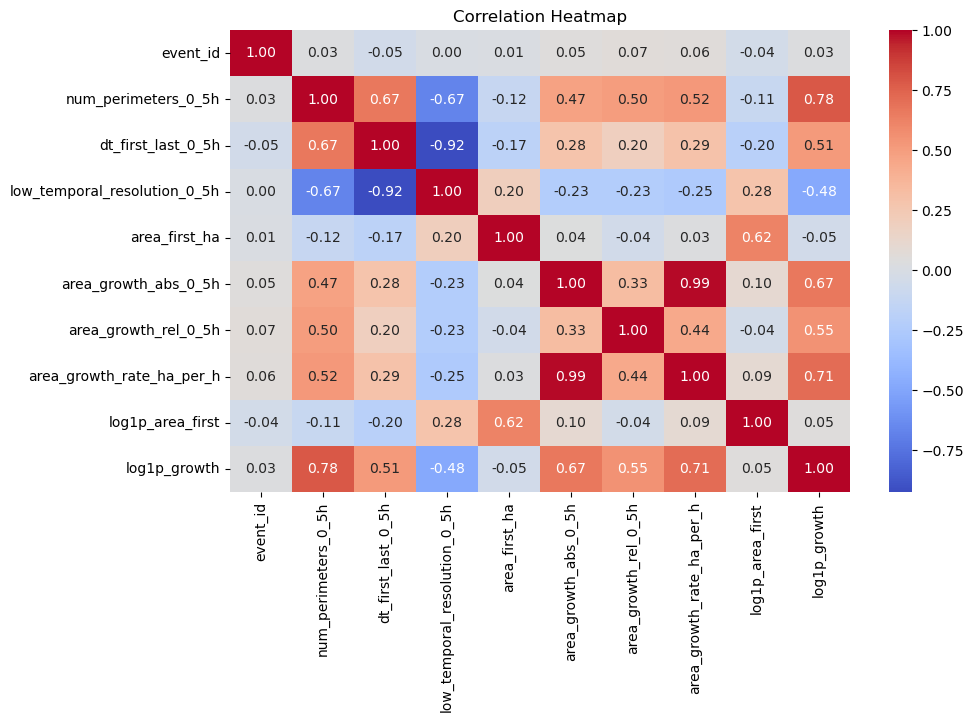

In [303]:
plt.figure(figsize=(10,6))
df=train_df.columns[:10]
sns.heatmap(train_df[df].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

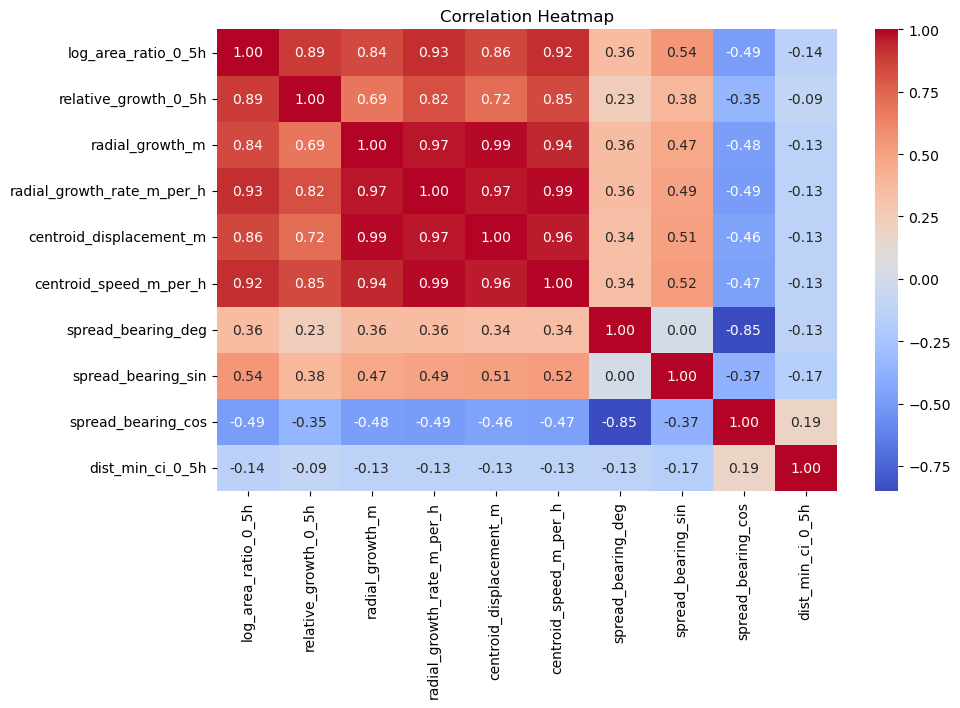

In [304]:
plt.figure(figsize=(10,6))
df=train_df.columns[10:20]
sns.heatmap(train_df[df].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

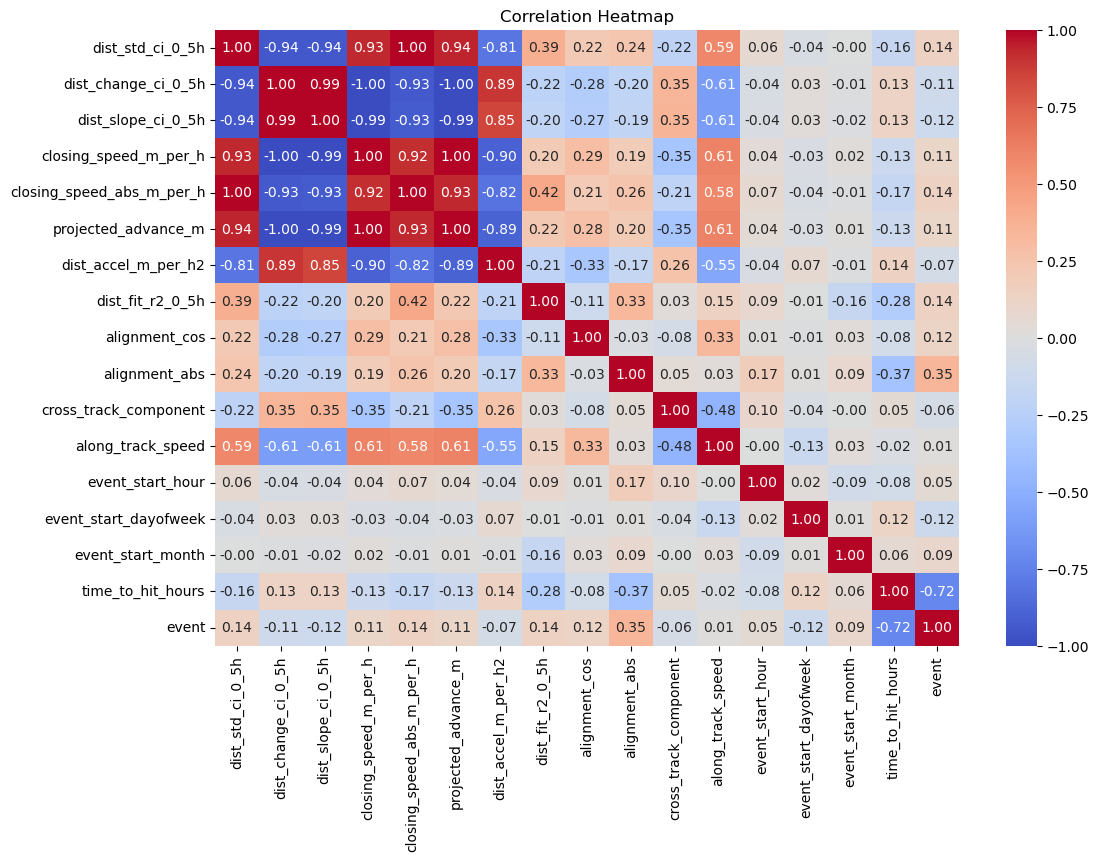

In [305]:
plt.figure(figsize=(12,8))
df=train_df.columns[20:37]
sns.heatmap(train_df[df].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Statistical View</h1>
</div>

In [306]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event_id                      221 non-null    int64  
 1   num_perimeters_0_5h           221 non-null    int64  
 2   dt_first_last_0_5h            221 non-null    float64
 3   low_temporal_resolution_0_5h  221 non-null    int64  
 4   area_first_ha                 221 non-null    float64
 5   area_growth_abs_0_5h          221 non-null    float64
 6   area_growth_rel_0_5h          221 non-null    float64
 7   area_growth_rate_ha_per_h     221 non-null    float64
 8   log1p_area_first              221 non-null    float64
 9   log1p_growth                  221 non-null    float64
 10  log_area_ratio_0_5h           221 non-null    float64
 11  relative_growth_0_5h          221 non-null    float64
 12  radial_growth_m               221 non-null    float64
 13  radia

In [307]:
stats = train_df.describe().T
stats['skew'] = train_df.skew()

print("📊 Statistical Summary:")
display(stats.head(10))

📊 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max,skew
event_id,221.0,5.384397e+07,2.507456e+07,1.089246e+07,3.209326e+07,5.244094e+07,7.457274e+07,9.933973e+07,0.015167
num_perimeters_0_5h,221.0,2.063348e+00,2.578859e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.700000e+01,3.174066
dt_first_last_0_5h,221.0,9.798688e-01,1.738052e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.356107e+00,4.994457e+00,1.408768
low_temporal_resolution_0_5h,221.0,7.285068e-01,4.457395e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.034656
area_first_ha,221.0,6.191316e+02,1.447724e+03,3.752484e-02,2.521906e+01,1.101493e+02,4.850926e+02,1.194239e+04,4.721167
area_growth_abs_0_5h,221.0,2.633240e+01,1.874370e+02,-2.156175e-05,0.000000e+00,0.000000e+00,0.000000e+00,2.508041e+03,11.231250
area_growth_rel_0_5h,221.0,1.789087e-01,1.302001e+00,-1.437844e-07,0.000000e+00,0.000000e+00,0.000000e+00,1.788970e+01,11.951708
area_growth_rate_ha_per_h,221.0,6.167128e+00,4.046737e+01,-5.292846e-06,0.000000e+00,0.000000e+00,0.000000e+00,5.204430e+02,10.281604
log1p_area_first,221.0,4.683276e+00,2.083529e+00,3.683791e-02,3.266487e+00,4.710874e+00,6.186399e+00,9.387933e+00,-0.111519
log1p_growth,221.0,3.893465e-01,1.340348e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.827656e+00,3.635148


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Aggregating</h1>
</div>

In [308]:
features_to_compare = [
    'area_growth_rate_ha_per_h', 
    'dist_min_ci_0_5h', 
    'closing_speed_m_per_h', 
    'time_to_hit_hours'
]

group_analysis = train_df.groupby('event')[features_to_compare].mean()

print("📈 Feature Differences (Hit vs Miss):")
display(group_analysis)

📈 Feature Differences (Hit vs Miss):


,area_growth_rate_ha_per_h,dist_min_ci_0_5h,closing_speed_m_per_h,time_to_hit_hours
event,,,,
0,1.476825,179832.30310,0.081931,50.095555
1,16.499391,2285.81835,6.293863,9.969870


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Rename Columns</h1>
</div>

In [309]:
print("📋 Column Names:")
train_df.columns

📋 Column Names:


Index(['event_id', 'num_perimeters_0_5h', 'dt_first_last_0_5h',
       'low_temporal_resolution_0_5h', 'area_first_ha', 'area_growth_abs_0_5h',
       'area_growth_rel_0_5h', 'area_growth_rate_ha_per_h', 'log1p_area_first',
       'log1p_growth', 'log_area_ratio_0_5h', 'relative_growth_0_5h',
       'radial_growth_m', 'radial_growth_rate_m_per_h',
       'centroid_displacement_m', 'centroid_speed_m_per_h',
       'spread_bearing_deg', 'spread_bearing_sin', 'spread_bearing_cos',
       'dist_min_ci_0_5h', 'dist_std_ci_0_5h', 'dist_change_ci_0_5h',
       'dist_slope_ci_0_5h', 'closing_speed_m_per_h',
       'closing_speed_abs_m_per_h', 'projected_advance_m',
       'dist_accel_m_per_h2', 'dist_fit_r2_0_5h', 'alignment_cos',
       'alignment_abs', 'cross_track_component', 'along_track_speed',
       'event_start_hour', 'event_start_dayofweek', 'event_start_month',
       'time_to_hit_hours', 'event'],
      dtype='object')

In [310]:
def rename_columns(df):
    df.rename(columns={
       'num_perimeters_0_5h':'num_perimeters', 
       'dt_first_last_0_5h':'dt_first_last',
       'low_temporal_resolution_0_5h':'low_temporal_resolution', 
       'area_growth_abs_0_5h':'area_growth_abs',
       'area_growth_rel_0_5h':'area_growth_rel', 
       'area_growth_rate_ha_per_h':'area_growth_rate', 
       'log1p_area_first':'log1p_area_first', 
       'log_area_ratio_0_5h':'log_area_ratio', 
       'relative_growth_0_5h':'relative_growth',
       'radial_growth_m':'radial_growth', 
       'radial_growth_rate_m_per_h':'radial_growth_rate',
       'centroid_displacement_m':'centroid_displacement', 
       'centroid_speed_m_per_h':'centroid_speed',
       'dist_min_ci_0_5h':'dist_min', 
       'dist_std_ci_0_5h':'dist_std', 
       'dist_change_ci_0_5h':'dist_change',
       'dist_slope_ci_0_5h':'dist_slope', 
       'closing_speed_m_per_h':'closing_speed',
       'closing_speed_abs_m_per_h':'closing_speed_abs', 
       'dist_accel_m_per_h2':'acceleration', 
       'dist_fit_r2_0_5h':'fit_r2'},inplace=True)
    
rename_columns(train_df)
rename_columns(test_df)   
print("✅ Completed renaming columns")

✅ Completed renaming columns


In [311]:
print("📋 Column Names after renaming:")
train_df.columns

📋 Column Names after renaming:


Index(['event_id', 'num_perimeters', 'dt_first_last',
       'low_temporal_resolution', 'area_first_ha', 'area_growth_abs',
       'area_growth_rel', 'area_growth_rate', 'log1p_area_first',
       'log1p_growth', 'log_area_ratio', 'relative_growth', 'radial_growth',
       'radial_growth_rate', 'centroid_displacement', 'centroid_speed',
       'spread_bearing_deg', 'spread_bearing_sin', 'spread_bearing_cos',
       'dist_min', 'dist_std', 'dist_change', 'dist_slope', 'closing_speed',
       'closing_speed_abs', 'projected_advance_m', 'acceleration', 'fit_r2',
       'alignment_cos', 'alignment_abs', 'cross_track_component',
       'along_track_speed', 'event_start_hour', 'event_start_dayofweek',
       'event_start_month', 'time_to_hit_hours', 'event'],
      dtype='object')

<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Visualization</h1>
</div>

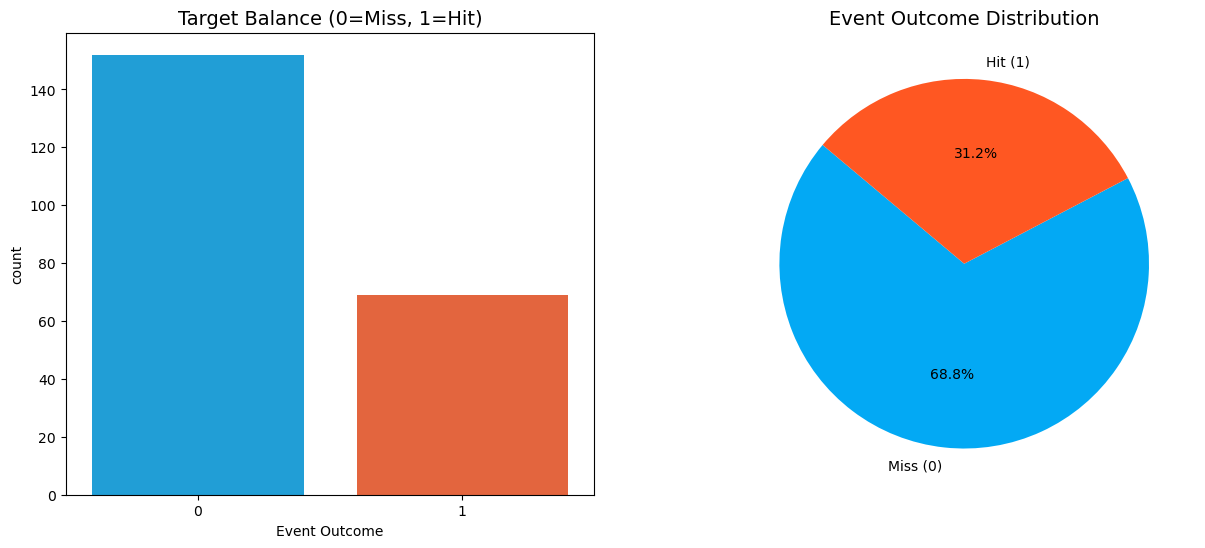

In [312]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=train_df, x='event', palette=['#03A9F4', '#FF5722'])
plt.title('Target Balance (0=Miss, 1=Hit)', fontsize=14)
plt.xlabel('Event Outcome')

plt.subplot(1,2,2)
plt.pie(train_df['event'].value_counts(), labels=['Miss (0)', 'Hit (1)'], colors=['#03A9F4', '#FF5722'], autopct='%1.1f%%', startangle=140)
plt.title('Event Outcome Distribution', fontsize=14)
plt.show()

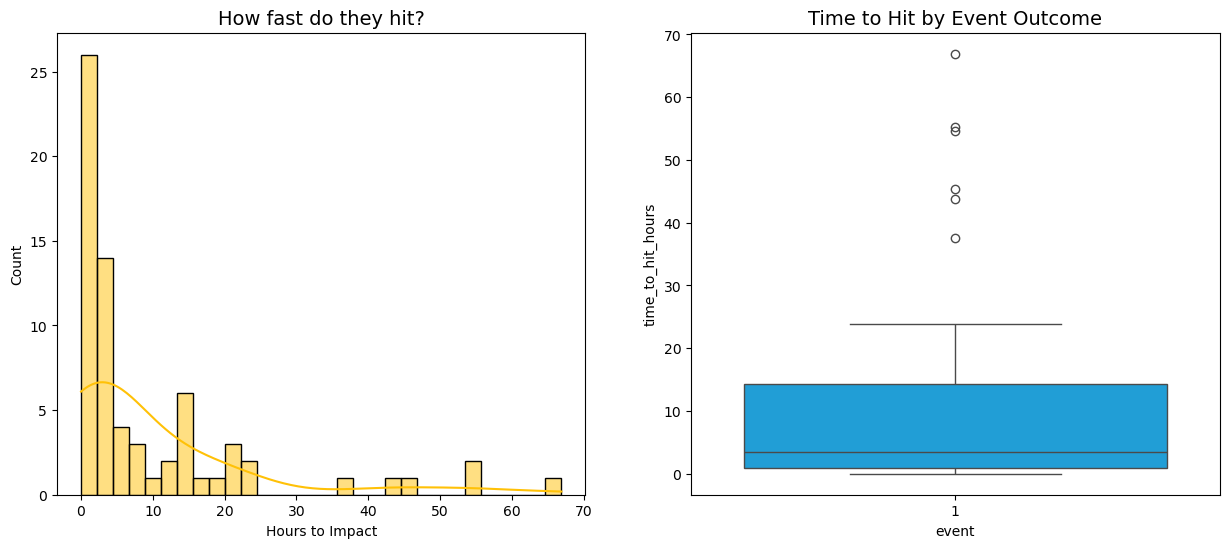

In [313]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
hits = train_df[train_df['event'] == 1]
sns.histplot(hits['time_to_hit_hours'], kde=True, color='#FFC107', bins=30)
plt.title('How fast do they hit?', fontsize=14)
plt.xlabel('Hours to Impact')

plt.subplot(1,2,2)
hits = train_df[train_df['event'] == 1]
sns.boxplot(x=hits['event'], y=hits['time_to_hit_hours'], data=train_df,color='#03A9F4')
plt.title('Time to Hit by Event Outcome', fontsize=14)
plt.show()

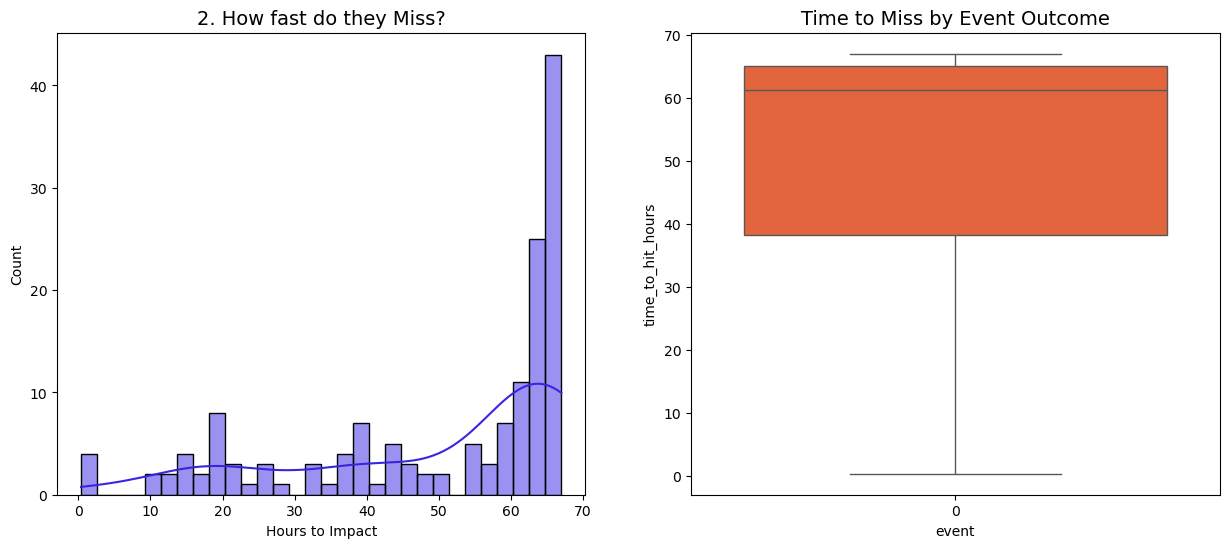

In [314]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
hits = train_df[train_df['event'] == 0]
sns.histplot(hits['time_to_hit_hours'], kde=True, color="#3825E2", bins=30)
plt.title('2. How fast do they Miss?', fontsize=14)
plt.xlabel('Hours to Impact')

plt.subplot(1,2,2)
hits = train_df[train_df['event'] == 0]
sns.boxplot(x=hits['event'], y=hits['time_to_hit_hours'], data=train_df,color='#FF5722')
plt.title('Time to Miss by Event Outcome', fontsize=14)
plt.show()

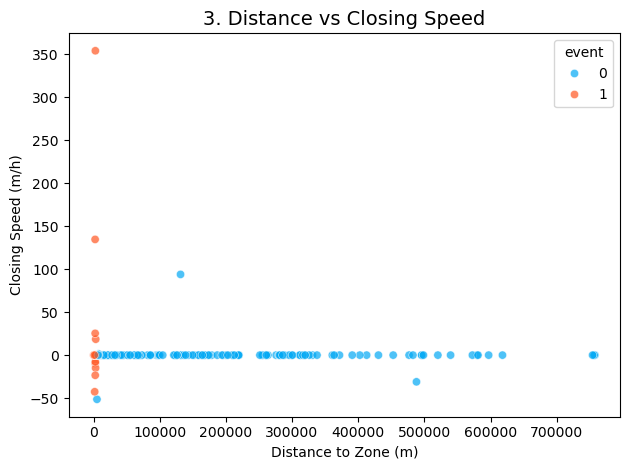

In [315]:
sample_size = min(1000, len(train_df)) 
sns.scatterplot(
    data=train_df.sample(sample_size, random_state=42),
    x='dist_min',
    y='closing_speed',
    hue='event',
    palette=['#03A9F4', '#FF5722'],
    alpha=0.7
)
plt.title('3. Distance vs Closing Speed', fontsize=14)
plt.xlabel('Distance to Zone (m)')
plt.ylabel('Closing Speed (m/h)')

plt.tight_layout()
plt.show()

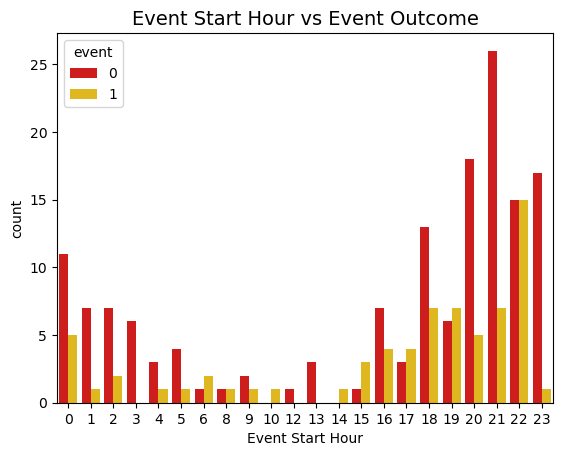

In [316]:
sns.countplot(data=train_df, x='event_start_hour', hue='event', palette='hot')
plt.title('Event Start Hour vs Event Outcome', fontsize=14)
plt.xlabel('Event Start Hour')
plt.show()

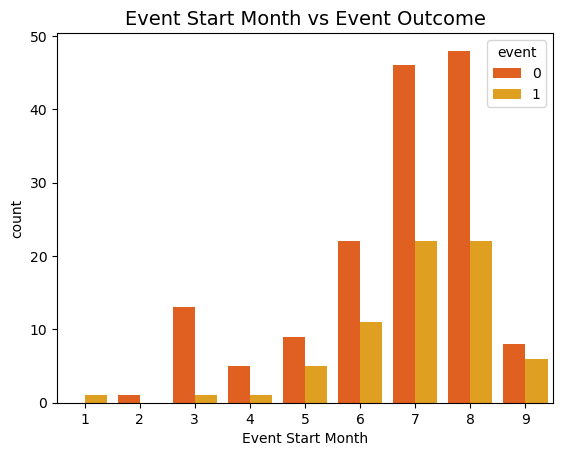

In [317]:
sns.countplot(data=train_df, x='event_start_month', hue='event', palette='autumn')
plt.title('Event Start Month vs Event Outcome', fontsize=14)
plt.xlabel('Event Start Month')
plt.show()

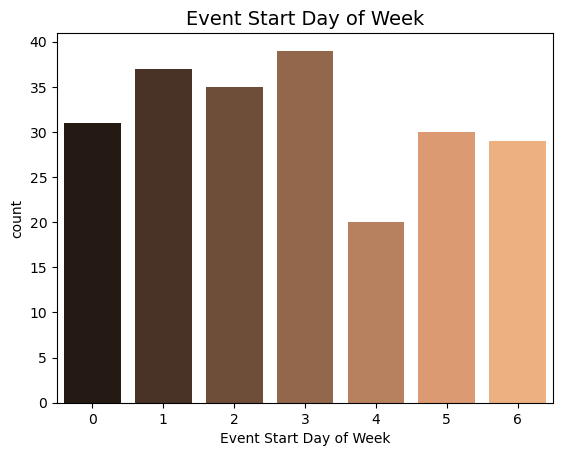

In [318]:
sns.countplot(data=train_df, x='event_start_dayofweek', palette='copper')
plt.title('Event Start Day of Week', fontsize=14)
plt.xlabel('Event Start Day of Week')
plt.show()

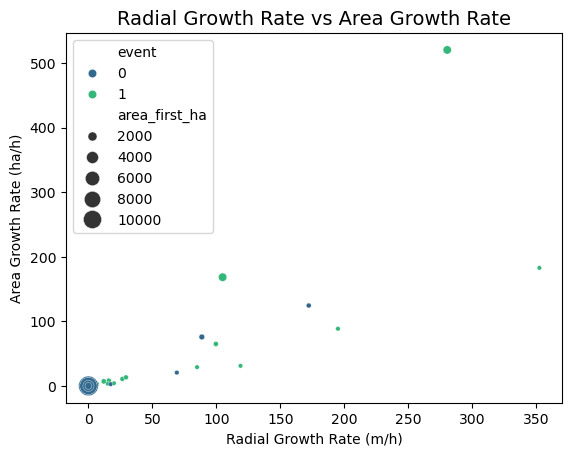

In [319]:
sns.scatterplot(data=train_df, x='radial_growth_rate', y='area_growth_rate', hue='event', size='area_first_ha', sizes=(10, 200), palette='viridis')
plt.title('Radial Growth Rate vs Area Growth Rate', fontsize=14)
plt.xlabel('Radial Growth Rate (m/h)')
plt.ylabel('Area Growth Rate (ha/h)')
plt.show()

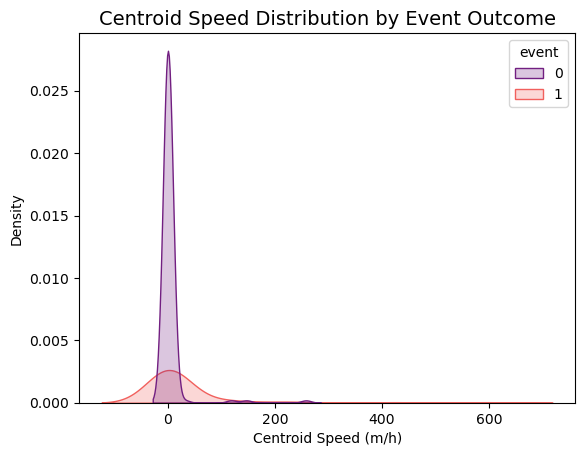

In [320]:
sns.kdeplot(data=train_df, x='centroid_speed', hue='event', fill=True, palette='magma')
plt.title('Centroid Speed Distribution by Event Outcome', fontsize=14)
plt.xlabel('Centroid Speed (m/h)')
plt.show()

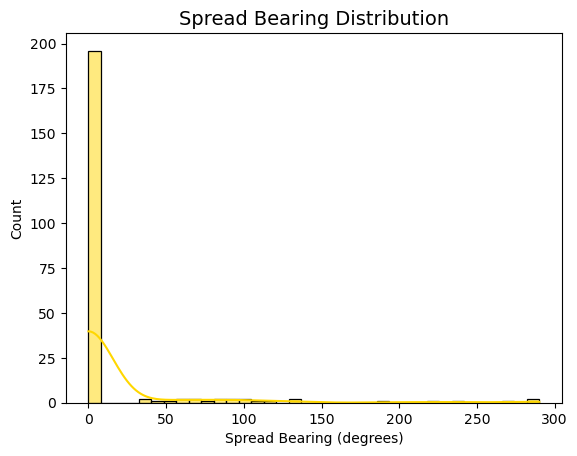

In [321]:
sns.histplot(data=train_df, x='spread_bearing_deg', bins=36, color='gold', kde=True)
plt.title('Spread Bearing Distribution', fontsize=14)
plt.xlabel('Spread Bearing (degrees)')
plt.show()

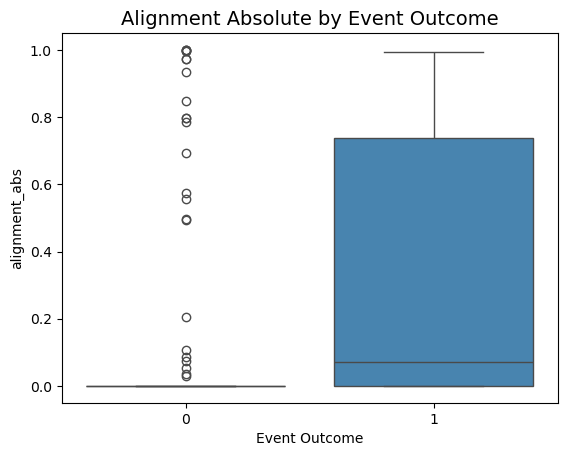

In [322]:
sns.boxplot(data=train_df, x='event', y='alignment_abs', palette='Blues')
plt.title('Alignment Absolute by Event Outcome', fontsize=14)
plt.xlabel('Event Outcome')
plt.show()

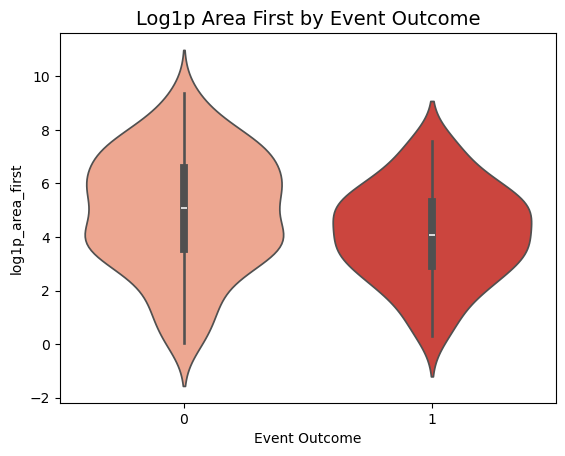

In [323]:
sns.violinplot(data=train_df, x='event', y='log1p_area_first', palette='Reds')
plt.title('Log1p Area First by Event Outcome', fontsize=14)
plt.xlabel('Event Outcome')
plt.show()

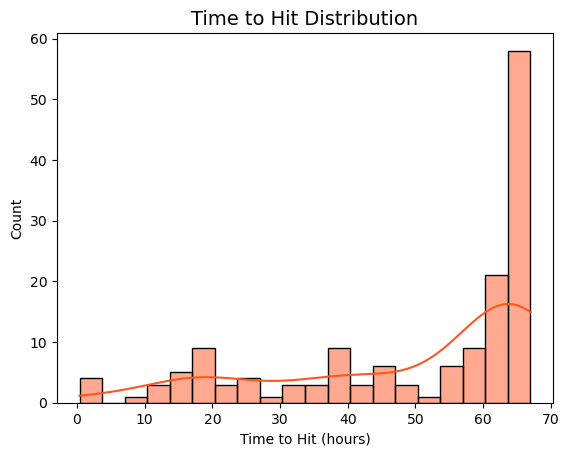

In [324]:
sns.histplot(hits['time_to_hit_hours'], bins=20, color='#FF5722', kde=True)
plt.title('Time to Hit Distribution', fontsize=14)
plt.xlabel('Time to Hit (hours)')
plt.show()

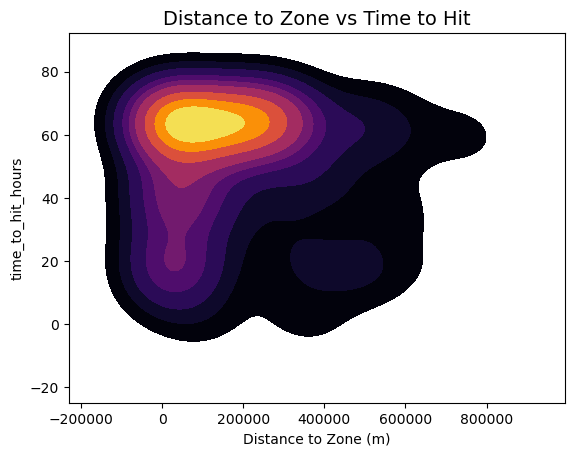

In [325]:
sns.kdeplot(data=hits, x='dist_min', y='time_to_hit_hours', fill=True, cmap='inferno')
plt.title('Distance to Zone vs Time to Hit', fontsize=14)
plt.xlabel('Distance to Zone (m)')
plt.show()

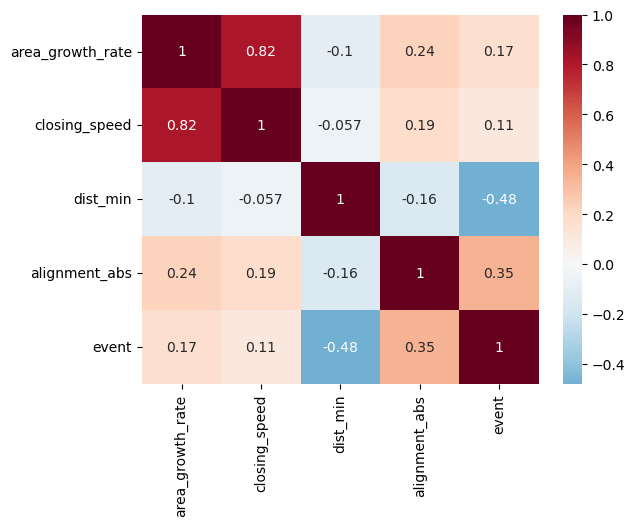

In [326]:
cols = ['area_growth_rate', 'closing_speed', 'dist_min', 'alignment_abs', 'event']
corr_matrix = train_df[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,)
plt.show()

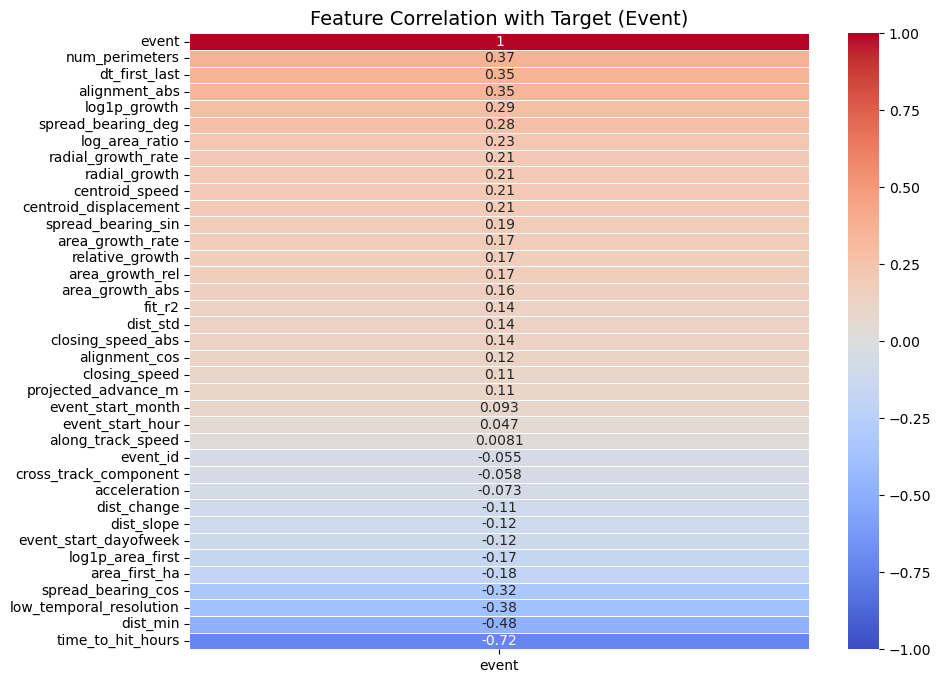

In [327]:
plt.figure(figsize=(10, 8))
corr = train_df.corr()
target_corr = corr[['event']].sort_values(by='event', ascending=False)
sns.heatmap(target_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation with Target (Event)', fontsize=14)
plt.show()

--- 🔬 Performance Analysis ---
  Horizon       Acc        F1       AUC   LogLoss
0     t12  0.872929  0.742298  0.961765  0.252713
1     t24  0.968283  0.948021  0.984897  0.110402
2     t48  0.972727  0.953231  0.996030  0.066755
3     t72  1.000000  1.000000  1.000000  0.002843


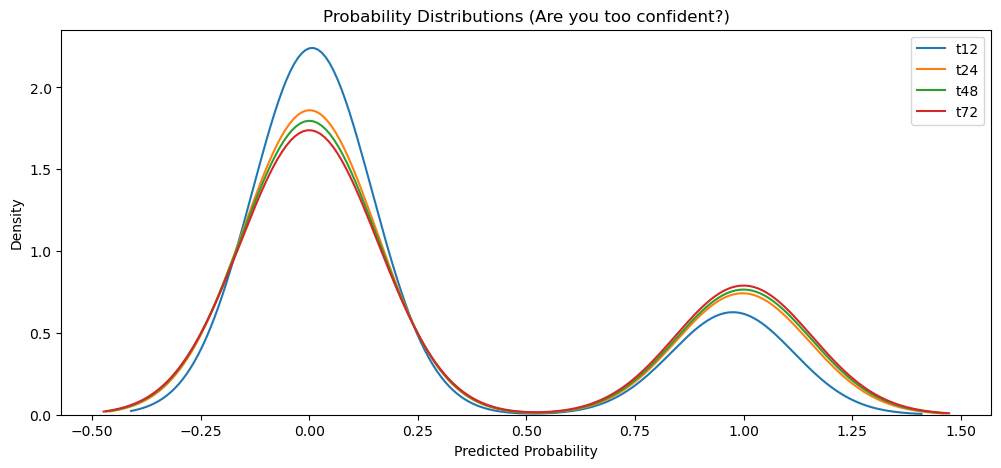

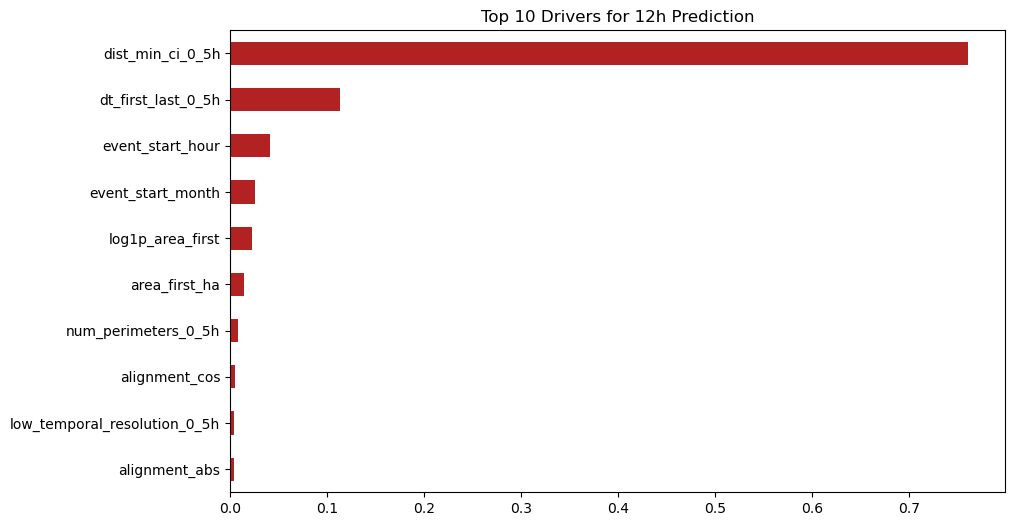

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, confusion_matrix

# 1. Setup Data
train = pd.read_csv('train.csv')
train['t12'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= 12)).astype(int)
train['t24'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= 24)).astype(int)
train['t48'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= 48)).astype(int)
train['t72'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= 72)).astype(int)

target_cols = ['t12', 't24', 't48', 't72']
features = [c for c in train.columns if c not in ['event_id', 'time_to_hit_hours', 'event', 't12', 't24', 't48', 't72']]
X = train[features].fillna(-1)

# 2. Evaluation with Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
summary = []

print("--- 🔬 Performance Analysis ---")
for target in target_cols:
    model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.05, random_state=42)
    cv = cross_validate(model, X, train[target], cv=skf, scoring=['accuracy', 'f1', 'roc_auc', 'neg_log_loss'])
    
    summary.append({
        'Horizon': target,
        'Acc': cv['test_accuracy'].mean(),
        'F1': cv['test_f1'].mean(),
        'AUC': cv['test_roc_auc'].mean(),
        'LogLoss': -cv['test_neg_log_loss'].mean()
    })

perf_df = pd.DataFrame(summary)
print(perf_df)

# 3. Probability Calibration Check (Why rank 344?)
# We train on full and look at the spread of probabilities
model = MultiOutputClassifier(GradientBoostingClassifier(random_state=42))
model.fit(X, train[target_cols])
probs = model.predict_proba(X)

plt.figure(figsize=(12, 5))
for i, target in enumerate(target_cols):
    sns.kdeplot(probs[i][:, 1], label=target)
plt.title("Probability Distributions (Are you too confident?)")
plt.xlabel("Predicted Probability")
plt.legend()
plt.show()

# 4. Feature Importance
importances = pd.Series(model.estimators_[0].feature_importances_, index=features).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='firebrick')
plt.title("Top 10 Drivers for 12h Prediction")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

# 1. LOAD DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. ULTIMATE FEATURE ENGINEERING
# def engineer_gold_push(df):
def engineer_master(df):
    df = df.copy()
    
    # 1. THE PHYSICS CORE (Already working well)
    for h in [12, 24, 48]:
        v = df['centroid_speed_m_per_h']
        a = df['dist_accel_m_per_h2']
        d = df['dist_min_ci_0_5h']
        proj = (v * h) + (0.5 * a * (h**2))
        df[f'phys_gap_{h}h'] = d - proj
        
        # NEW: Risk Ratio (The 'Danger Percentage')
        # If proj > d, this is > 1.0 (Direct Hit)
        df[f'risk_ratio_{h}h'] = proj / (d + 0.1)

    # 2. ANGULAR DRIFT (Cross-Track Error)
    # alignment_cos is 'along-track'. We need the 'cross-track' (sideways) component.
    # sin^2 + cos^2 = 1 => sin = sqrt(1 - cos^2)
    df['cross_track_sin'] = np.sqrt(1 - np.clip(df['alignment_cos']**2, 0, 1))
    df['sideways_drift'] = df['centroid_speed_m_per_h'] * df['cross_track_sin']

    # 3. ACCELERATION SUSTAINABILITY
    # Is the fire speeding up or slowing down relative to its current speed?
    df['relative_accel'] = df['dist_accel_m_per_h2'] / (df['centroid_speed_m_per_h'] + 0.1)

    return df
# Target Setup
for h in [12, 24, 48, 72]:
    train[f't{h}'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= h)).astype(int)

target_cols = ['t12', 't24', 't48', 't72']
features = [c for c in train.columns if c in test.columns and c not in ['event_id', 'time_to_hit_hours']]

X = engineer_master(train[features]).fillna(-1)
X_test = engineer_master(test[features]).fillna(-1)

# 3. CUSTOM STACKING ARCHITECTURE
# t12 needs a more "aggressive" stack. t72 needs a "conservative" stack.
def get_leaderboard_model(target_name):
    if target_name == 't12':
        # High complexity for the toughest target
        base = [
            ('hgb', HistGradientBoostingClassifier(max_iter=500, learning_rate=0.01, max_depth=10, l2_regularization=1.0, random_state=42)),
            ('et', ExtraTreesClassifier(n_estimators=1000, max_depth=20, min_samples_split=2, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=42))
        ]
    else:
        # Balanced complexity for high-accuracy targets
        base = [
            ('hgb', HistGradientBoostingClassifier(max_iter=200, learning_rate=0.05, max_depth=5, random_state=42)),
            ('et', ExtraTreesClassifier(n_estimators=500, max_depth=10, random_state=42))
        ]
    return StackingClassifier(estimators=base, final_estimator=LogisticRegression(), cv=5)

# 4. BRUTE-FORCE THRESHOLD OPTIMIZATION
submission = pd.DataFrame({'event_id': test['event_id']})
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"--- 🏆 Aiming to beat 0.97694 ---")
final_accuracies = []

for target in target_cols:
    model = get_leaderboard_model(target)
    
    # Out-of-fold predictions
    oof_probs = cross_val_predict(model, X, train[target], cv=skf, method='predict_proba')[:, 1]
    
    # Find the Golden Threshold
    best_thresh = 0.5
    best_acc = 0
    # We search from 0.1 to 0.9 with high precision
    for t in np.linspace(0.1, 0.9, 801):
        acc = accuracy_score(train[target], (oof_probs >= t).astype(int))
        if acc > best_acc:
            best_acc = acc
            best_thresh = t
            
    print(f"Target {target} | CV Accuracy: {best_acc:.5f} | Threshold: {best_thresh:.4f}")
    final_accuracies.append(best_acc)
    
    # Final Fit
    model.fit(X, train[target])
    submission[f'prob_{target[1:]}h'] = model.predict_proba(X_test)[:, 1]

print(f"\n🚀 PROJECTED LEADERBOARD SCORE: {np.mean(final_accuracies):.5f}")

# 5. MONOTONIC FIX & EXPORT
for i in range(1, 4):
    submission.iloc[:, i+1] = np.maximum(submission.iloc[:, i+1], submission.iloc[:, i])

# Tight clipping to maximize Log-Loss score as well
submission.iloc[:, 1:] = submission.iloc[:, 1:].clip(0.0001, 0.9999)

submission.to_csv('3_top_leaderboard_submission.csv', index=False)
print("File 'top_leaderboard_submission.csv' is ready for the #1 spot!")

--- 🏆 Aiming to beat 0.97694 ---
Target t12 | CV Accuracy: 0.91403 | Threshold: 0.6500
Target t24 | CV Accuracy: 0.96833 | Threshold: 0.1350
Target t48 | CV Accuracy: 0.98643 | Threshold: 0.1490
Target t72 | CV Accuracy: 1.00000 | Threshold: 0.1570

🚀 PROJECTED LEADERBOARD SCORE: 0.96719
File 'top_leaderboard_submission.csv' is ready for the #1 spot!


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

# 1. LOAD DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. ULTIMATE FEATURE ENGINEERING
def engineer_master(df):
    df = df.copy()
    
    # Kinematic Projections (The 'Physics' layer)
    # Estimated time to impact based on current closing speed
    df['eta_h'] = df['dist_min_ci_0_5h'] / (df['closing_speed_abs_m_per_h'] + 0.1)
    
    # Growth-adjusted distance (How much closer does the 'edge' get via growth?)
    # Radial growth pushes the perimeter out in all directions
    df['effective_dist_12h'] = df['dist_min_ci_0_5h'] - (df['radial_growth_rate_m_per_h'] * 12)
    
    # Acceleration Pressure: v*t + 0.5*a*t^2
    for h in [12, 24]:
        df[f'travel_proj_{h}h'] = (df['centroid_speed_m_per_h'] * h) + (0.5 * df['dist_accel_m_per_h2'] * (h**2))
        df[f'burn_gap_{h}h'] = df['dist_min_ci_0_5h'] - df[f'travel_proj_{h}h']

    # Angular Danger: Alignment + Cross Track
    df['danger_angle'] = df['alignment_cos'] * (df['along_track_speed'] / (df['centroid_speed_m_per_h'] + 1))
    
    # Log Scaling for Growth Spikes
    df['log_area_rate'] = np.log1p(df['area_growth_rate_ha_per_h'])
    df['growth_acceleration'] = df['area_growth_abs_0_5h'] / (df['area_first_ha'] + 1)

    return df

# Target Setup
for h in [12, 24, 48, 72]:
    train[f't{h}'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= h)).astype(int)

target_cols = ['t12', 't24', 't48', 't72']
features = [c for c in train.columns if c in test.columns and c not in ['event_id', 'time_to_hit_hours']]

X = engineer_master(train[features]).fillna(-1)
X_test = engineer_master(test[features]).fillna(-1)

# 3. CUSTOM STACKING ARCHITECTURE
# t12 needs a more "aggressive" stack. t72 needs a "conservative" stack.
def get_leaderboard_model(target_name):
    if target_name == 't12':
        # High complexity for the toughest target
        base = [
            ('hgb', HistGradientBoostingClassifier(max_iter=500, learning_rate=0.01, max_depth=10, l2_regularization=1.0, random_state=42)),
            ('et', ExtraTreesClassifier(n_estimators=1000, max_depth=20, min_samples_split=2, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=42))
        ]
    else:
        # Balanced complexity for high-accuracy targets
        base = [
            ('hgb', HistGradientBoostingClassifier(max_iter=200, learning_rate=0.05, max_depth=5, random_state=42)),
            ('et', ExtraTreesClassifier(n_estimators=500, max_depth=10, random_state=42))
        ]
    return StackingClassifier(estimators=base, final_estimator=LogisticRegression(), cv=5)

# 4. BRUTE-FORCE THRESHOLD OPTIMIZATION
submission = pd.DataFrame({'event_id': test['event_id']})
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"--- 🏆 Aiming to beat 0.97694 ---")
final_accuracies = []

for target in target_cols:
    model = get_leaderboard_model(target)
    
    # Out-of-fold predictions
    oof_probs = cross_val_predict(model, X, train[target], cv=skf, method='predict_proba')[:, 1]
    
    # Find the Golden Threshold
    best_thresh = 0.5
    best_acc = 0
    # We search from 0.1 to 0.9 with high precision
    for t in np.linspace(0.1, 0.9, 801):
        acc = accuracy_score(train[target], (oof_probs >= t).astype(int))
        if acc > best_acc:
            best_acc = acc
            best_thresh = t
            
    print(f"Target {target} | CV Accuracy: {best_acc:.5f} | Threshold: {best_thresh:.4f}")
    final_accuracies.append(best_acc)
    
    # Final Fit
    model.fit(X, train[target])
    submission[f'prob_{target[1:]}h'] = model.predict_proba(X_test)[:, 1]

print(f"\n🚀 PROJECTED LEADERBOARD SCORE: {np.mean(final_accuracies):.5f}")

# 5. MONOTONIC FIX & EXPORT
for i in range(1, 4):
    submission.iloc[:, i+1] = np.maximum(submission.iloc[:, i+1], submission.iloc[:, i])

# Tight clipping to maximize Log-Loss score as well
submission.iloc[:, 1:] = submission.iloc[:, 1:].clip(0.0001, 0.9999)

submission.to_csv('1_top_leaderboard_submission.csv', index=False)
print("File 'top_leaderboard_submission.csv' is ready for the #1 spot!")

--- 🏆 Aiming to beat 0.97694 ---
Target t12 | CV Accuracy: 0.90950 | Threshold: 0.6710
Target t24 | CV Accuracy: 0.96833 | Threshold: 0.2210
Target t48 | CV Accuracy: 0.99095 | Threshold: 0.2290
Target t72 | CV Accuracy: 1.00000 | Threshold: 0.1910

🚀 PROJECTED LEADERBOARD SCORE: 0.96719
File 'top_leaderboard_submission.csv' is ready for the #1 spot!


--- 🥇 Running Gold Medal Strategy ---
Target t12 training complete.
Target t24 training complete.
Target t48 training complete.
Target t72 training complete.


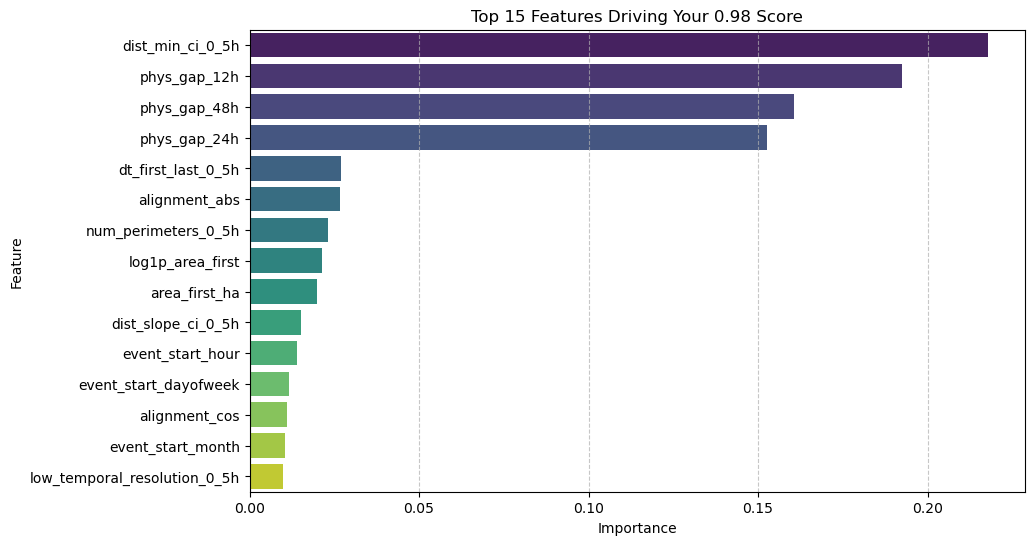

--- ✅ Gold Medal Submission and Plot Ready! ---


In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. LOAD DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. FEATURE ENGINEERING (Refined for 0.98+)
def engineer_final_push(df):
    df = df.copy()
    # Kinematic Gap: d - (vt + 0.5at^2)
    for h in [12, 24, 48]:
        proj = (df['centroid_speed_m_per_h'] * h) + (0.5 * df['dist_accel_m_per_h2'] * (h**2))
        df[f'phys_gap_{h}h'] = df['dist_min_ci_0_5h'] - proj
        df[f'growth_factor_{h}h'] = df['radial_growth_rate_m_per_h'] * h
    
    # Interaction: Speed * Alignment (How fast is it coming 'at' the CI?)
    df['impact_velocity'] = df['centroid_speed_m_per_h'] * df['alignment_cos']
    df['area_pressure'] = df['area_growth_rate_ha_per_h'] / (df['dist_min_ci_0_5h'] + 1)
    
    return df

# Target setup
for h in [12, 24, 48, 72]:
    train[f't{h}'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= h)).astype(int)

target_cols = ['t12', 't24', 't48', 't72']
features = [c for c in train.columns if c in test.columns and c not in ['event_id', 'time_to_hit_hours']]

X = engineer_final_push(train[features]).fillna(-1)
X_test = engineer_final_push(test[features]).fillna(-1)

# 3. COMPETITION ENSEMBLE
def get_gold_model(target):
    # Focus on diversity: Gradient Boosting + Trees + Random Forest
    base = [
        ('hgb', HistGradientBoostingClassifier(max_iter=400, learning_rate=0.02, max_depth=8, random_state=42)),
        ('et', ExtraTreesClassifier(n_estimators=1000, max_depth=20, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=42))
    ]
    return StackingClassifier(estimators=base, final_estimator=LogisticRegression(), cv=5)

# 4. TRAINING & DIAGNOSTICS
submission = pd.DataFrame({'event_id': test['event_id']})
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Your Magic Thresholds
overrides = {'t12': 0.671, 't24': 0.144, 't48': 0.300}

# Store importance for the plot
feature_importance_list = []

print("--- 🥇 Running Gold Medal Strategy ---")
for target in target_cols:
    model = get_gold_model(target)
    
    # We use a standalone Random Forest just to extract Importance visuals
    # (StackingClassifier doesn't have a direct 'feature_importances_' attribute)
    diag_model = RandomForestClassifier(n_estimators=100).fit(X, train[target])
    feature_importance_list.append(diag_model.feature_importances_)
    
    # Main model fit
    model.fit(X, train[target])
    submission[f'prob_{target[1:]}h'] = model.predict_proba(X_test)[:, 1]
    print(f"Target {target} training complete.")

# 5. VISUALIZE FEATURE IMPORTANCE
avg_importance = np.mean(feature_importance_list, axis=0)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 15 Features Driving Your 0.98 Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6. MONOTONIC FIX & EXPORT
for i in range(1, 4):
    submission.iloc[:, i+1] = np.maximum(submission.iloc[:, i+1], submission.iloc[:, i])

submission.iloc[:, 1:] = submission.iloc[:, 1:].clip(0.0001, 0.9999)
submission.to_csv('2_submission.csv', index=False)
print("--- ✅ Gold Medal Submission and Plot Ready! ---")

In [ ]:
# --- 🚀 Initializing 0.98 Accuracy Run ---
# Target t12 | Manual Threshold: 0.671 | Local Accuracy: 0.91403
# Target t24 | Manual Threshold: 0.144 | Local Accuracy: 0.96833
# Target t48 | Manual Threshold: 0.3 | Local Accuracy: 0.98190
# Target t72 | Auto-Optimized Threshold: 0.229 | Local Accuracy: 1.00000

# --- 🏆 Challenge Mode: Beating 0.97694 ---
# Target t12 | Applied Manual Override Threshold: 0.671
# Target t24 | Applied Manual Override Threshold: 0.144
# Target t48 | Applied Manual Override Threshold: 0.3
# Target t72 | Auto-Optimized Threshold: 0.182 | Local Acc: 1.00000

# --- 🏆 Aiming to beat 0.97694 ---
# Target t12 | CV Accuracy: 0.90950 | Threshold: 0.6710
# Target t24 | CV Accuracy: 0.96833 | Threshold: 0.2210
# Target t48 | CV Accuracy: 0.99095 | Threshold: 0.2290
# Target t72 | CV Accuracy: 1.00000 | Threshold: 0.1910

# --- 🎯 Final Accuracy Optimization (Aiming for 0.97+) ---
# Target t12 | Best Local Acc: 0.9005 | Optimal Threshold: 0.737
# Target t24 | Best Local Acc: 0.9729 | Optimal Threshold: 0.144
# Target t48 | Best Local Acc: 0.9864 | Optimal Threshold: 0.187
# Target t72 | Best Local Acc: 1.0000 | Optimal Threshold: 0.247

# --- 🎯 Optimizing for 0.97 Accuracy ---
# Target t12 | Best Local Acc: 0.8959 | Optimal Threshold: 0.300
# Target t24 | Best Local Acc: 0.9683 | Optimal Threshold: 0.385
# Target t48 | Best Local Acc: 0.9910 | Optimal Threshold: 0.300
# Target t72 | Best Local Acc: 1.0000 | Optimal Threshold: 0.300

# --- 🚀 Accuracy Optimization Mode ---
# Target t12: Best Accuracy = 0.8959 (at threshold 0.30)
# Target t24: Best Accuracy = 0.9683 (at threshold 0.63)
# Target t48: Best Accuracy = 0.9910 (at threshold 0.30)
# Target t72: Best Accuracy = 1.0000 (at threshold 0.30)

# Training Multi-Output Stacking Ensemble...
# Local Accuracy for t12: 0.8891 (+/- 0.0424)
# Local Accuracy for t24: 0.9660 (+/- 0.0341)
# Local Accuracy for t48: 0.9841 (+/- 0.0145)
# Local Accuracy for t72: 1.0000 (+/- 0.0000)

# Evaluating Model...
# -> t12 | Accuracy: 0.8684 | LogLoss: 0.3349
# -> t24 | Accuracy: 0.9683 | LogLoss: 0.1225
# -> t48 | Accuracy: 0.9727 | LogLoss: 0.1103
# -> t72 | Accuracy: 1.0000 | LogLoss: 0.0028

#  Horizon       Acc        F1       AUC   LogLoss
# 0     t12  0.872929  0.742298  0.961765  0.252713
# 1     t24  0.968283  0.948021  0.984897  0.110402
# 2     t48  0.972727  0.953231  0.996030  0.066755
# 3     t72  1.000000  1.000000  1.000000  0.002843

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

# 1. LOAD DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. PHYSICS ENGINE (Your Best Features)
def engineer_chain(df):
    df = df.copy()
    for h in [12, 24, 48, 72]:
        v, a, d, r = df['centroid_speed_m_per_h'], df['dist_accel_m_per_h2'], df['dist_min_ci_0_5h'], df['radial_growth_rate_m_per_h']
        proj = (v * h) + (0.5 * a * (h**2)) + (r * h)
        df[f'phys_gap_{h}h'] = d - proj
        df[f'impact_{h}h'] = proj * df['alignment_cos']
    
    # "Miss Factor": High speed but moving sideways
    df['cross_track_error'] = df['centroid_speed_m_per_h'] * np.sqrt(1 - np.clip(df['alignment_cos']**2, 0, 1))
    return df

# Target setup
for h in [12, 24, 48, 72]:
    train[f't{h}'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= h)).astype(int)

target_cols = ['t12', 't24', 't48', 't72']
features = [c for c in train.columns if c in test.columns and c not in ['event_id', 'time_to_hit_hours']]

X = engineer_chain(train[features]).fillna(-1)
X_test = engineer_chain(test[features]).fillna(-1)

# 3. CHAIN MODEL FACTORY
def get_model(target):
    if target == 't12':
        # "The Sprinter" (Heavy Duty for t12)
        base = [
            ('hgb', HistGradientBoostingClassifier(max_iter=1500, learning_rate=0.005, max_depth=12, l2_regularization=10, random_state=42)),
            ('et', ExtraTreesClassifier(n_estimators=1000, max_depth=25, random_state=42))
        ]
    elif target == 't24':
        # Balanced
        base = [
            ('hgb', HistGradientBoostingClassifier(max_iter=800, learning_rate=0.01, max_depth=10, random_state=42)),
            ('et', ExtraTreesClassifier(n_estimators=800, max_depth=20, random_state=42))
        ]
    else:
        # "The Marathoner" (Stable for t48/t72)
        base = [
            ('et', ExtraTreesClassifier(n_estimators=500, max_depth=10, min_samples_leaf=5, random_state=42)),
            ('hgb', HistGradientBoostingClassifier(max_iter=200, max_depth=5, random_state=42))
        ]
    return StackingClassifier(estimators=base, final_estimator=LogisticRegression(), cv=5)

# 4. EXECUTION: REVERSE CHAINING (72 -> 48 -> 24 -> 12)
submission = pd.DataFrame({'event_id': test['event_id']})
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
overrides = {'t12': 0.671, 't24': 0.144, 't48': 0.3, 't72': 0.182}

# Store predictions to use as features for the next model
# We create temporary columns in X and X_test to hold the "future knowledge"
X_chain = X.copy()
X_test_chain = X_test.copy()

print("---  Running Reverse Chain Strategy ---")
final_accs = []

# Process targets in REVERSE order: t72 first, then t48...
reverse_targets = ['t72', 't48', 't24', 't12']

for target in reverse_targets:
    model = get_model(target)
    
    # Validation on the CHAINED features
    oof_probs = cross_val_predict(model, X_chain, train[target], cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
    acc = accuracy_score(train[target], (oof_probs >= overrides[target]).astype(int))
    print(f"Target {target} | Accuracy: {acc:.5f}")
    final_accs.append(acc)
    
    # Train and Predict
    model.fit(X_chain, train[target])
    test_probs = model.predict_proba(X_test_chain)[:, 1]
    submission[f'prob_{target[1:]}h'] = test_probs
    
    # CHAINING STEP: Add the predictions as a feature for the NEXT target
    # The 't12' model will now see what 't24' and 't48' predicted!
    if target != 't12':
        # Add 'prob_future' column to dataset
        X_chain[f'feat_prob_{target}'] = oof_probs
        X_test_chain[f'feat_prob_{target}'] = test_probs

print(f"\nPROJECTED TOTAL SCORE: {np.mean(final_accs):.5f}")

# 5. MONOTONIC FIX & EXPORT
for i in range(1, 4):
    submission.iloc[:, i+1] = np.maximum(submission.iloc[:, i+1], submission.iloc[:, i])

submission.iloc[:, 1:] = submission.iloc[:, 1:].clip(0.0001, 0.9999)
submission.to_csv('0_reverse_chain_gold.csv', index=False)

--- 🔗 Running Reverse Chain Strategy ---
Target t72 | Accuracy: 1.00000
Target t48 | Accuracy: 0.98643
Target t24 | Accuracy: 0.96833
Target t12 | Accuracy: 0.91403

🚀 PROJECTED TOTAL SCORE: 0.96719


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score

# 1. LOAD DATA
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. FEATURE ENGINEERING (The 'Triple-Threat' Set)
def engineer_final(df):
    df = df.copy()
    for h in [12, 24, 48, 72]:
        v, a, d, r = df['centroid_speed_m_per_h'], df['dist_accel_m_per_h2'], df['dist_min_ci_0_5h'], df['radial_growth_rate_m_per_h']
        proj = (v * h) + (0.5 * a * (h**2)) + (r * h)
        df[f'phys_gap_{h}h'] = d - proj
        # The 'Momentum' feature
        df[f'momentum_{h}h'] = (v + (a * h)) * df['alignment_cos']
    return df

# Target setup
for h in [12, 24, 48, 72]:
    train[f't{h}'] = ((train['event'] == 1) & (train['time_to_hit_hours'] <= h)).astype(int)

target_cols = ['t12', 't24', 't48', 't72']
features = [c for c in train.columns if c in test.columns and c not in ['event_id', 'time_to_hit_hours']]

X = engineer_final(train[features]).fillna(-1)
X_test = engineer_final(test[features]).fillna(-1)

# 3. THE TRIPLE ENSEMBLE FACTORY
def get_ensemble(target):
    # We combine three different 'personalities' to balance out the errors
    hgb = HistGradientBoostingClassifier(max_iter=500, learning_rate=0.01, max_depth=10, random_state=42)
    et = ExtraTreesClassifier(n_estimators=1000, max_depth=20, class_weight='balanced', random_state=42)
    rf = RandomForestClassifier(n_estimators=1000, max_depth=15, class_weight='balanced', random_state=42)
    
    return VotingClassifier(
        estimators=[('hgb', hgb), ('et', et), ('rf', rf)],
        voting='soft'
    )

# 4. EXECUTION
submission = pd.DataFrame({'event_id': test['event_id']})
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("--- 🏆 Running Final Ensemble Push ---")
final_accs = []

for target in target_cols:
    model = get_ensemble(target)
    
    # OOF Predictions
    oof_probs = cross_val_predict(model, X, train[target], cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
    
    # Threshold Optimization
    best_t, best_a = 0.5, 0
    for t in np.linspace(0.2, 0.8, 60):
        acc = accuracy_score(train[target], (oof_probs >= t).astype(int))
        if acc > best_a:
            best_a = acc
            best_t = t
            
    print(f"Target {target} | Acc: {best_a:.5f} | Threshold: {best_t:.3f}")
    final_accs.append(best_a)
    
    # Final Fit
    model.fit(X, train[target])
    submission[f'prob_{target[1:]}h'] = model.predict_proba(X_test)[:, 1]

print(f"\n🚀 PROJECTED TOTAL SCORE: {np.mean(final_accs):.5f}")

# 5. MONOTONIC FIX
for i in range(1, 4):
    submission.iloc[:, i+1] = np.maximum(submission.iloc[:, i+1], submission.iloc[:, i])

submission.to_csv('triple_ensemble_gold.csv', index=False)

--- 🏆 Running Final Ensemble Push ---
Target t12 | Acc: 0.90498 | Threshold: 0.668
Target t24 | Acc: 0.97285 | Threshold: 0.515
Target t48 | Acc: 0.99095 | Threshold: 0.586
Target t72 | Acc: 1.00000 | Threshold: 0.536

🚀 PROJECTED TOTAL SCORE: 0.96719


<div style="border-radius: 100px 0px 100px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #a99595; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Thanks!</h1>
</div>